# Problem Sheet 5

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from numpy.random import randn, random, seed
from scipy.stats import multivariate_normal

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

## Problem 1

In [22]:
N = 10
sigma2 = 0.5
beta_true = np.array([0.2, 2.3])[:, None]

In [99]:
seed(314)
sigma2_p = 0.4
beta_prior = multivariate_normal(mean=[0, 0], cov=sigma2_p)
beta_sample = beta_prior.rvs()[:, None]
beta_sample

array([[0.10504165],
       [0.49455776]])

In [100]:
X = np.c_[np.ones(N), np.linspace(-1, 1, N) + random(N) * 0.1]

Y = X @ beta_sample + randn(N)[:, None] * sigma2

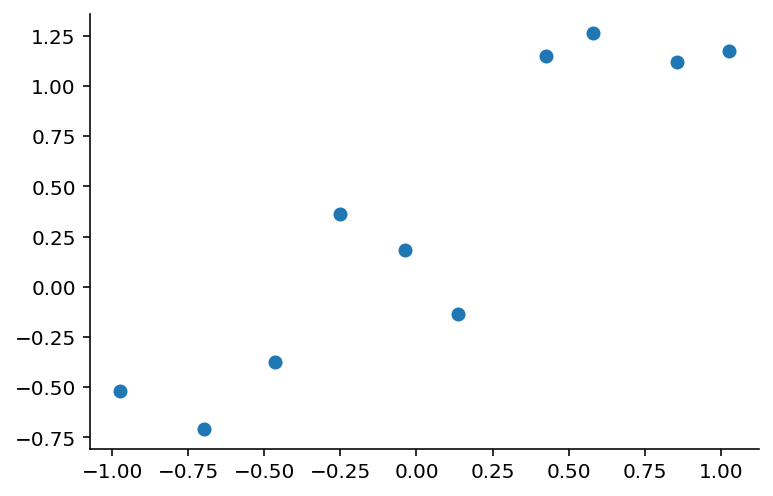

In [101]:
plt.scatter(X[:, 1], Y)

In [102]:
from scipy.optimize import minimize

In [103]:
def log_model_evidence(sv, y, X):
    s2, s2_p = sv ** 2
    N, M = X.shape
    I = np.identity(N)
    SN = I + s2_p / s2 * X @ X.T
    logL = -N / 2 * np.log(s2) - np.log(det(SN)) / 2 - y.T @ inv(SN) @ y / (2 * s2)
    return -logL.item()

In [105]:
seed(314)
s0 = np.array([1, 1])
evidence = minimize(log_model_evidence, s0, args=(Y, X))
evidence

      fun: -2.2768598988882323
 hess_inv: array([[ 0.00735843, -0.00069757],
       [-0.00069757,  0.16434802]])
      jac: array([4.76837158e-06, 5.42402267e-06])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 8
     njev: 19
   status: 0
  success: True
        x: array([0.3418904 , 0.75171063])

In [108]:
# Estimated σ2 and σ2_p
evidence.x ** 2

array([0.11688905, 0.56506887])